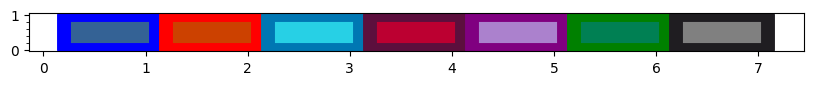

In [69]:
import json

import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.patches as ptchs
import matplotlib.pyplot as plt
import matplotlib.text as mtext
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import scipy.integrate
import scipy.optimize
from matplotlib import gridspec
from matplotlib.ticker import FormatStrFormatter
from pandas.core.base import PandasObject
from sklearn.linear_model import Ridge

global_save = True
cpu_system = "das6"
cpu_vd_input_folder = f"../cpu-sequential/{cpu_system}-cpu/"
cpu_mb_input_folder = f"../microbenchmarks/{cpu_system}/"
cpu_output_folder = f"../../images/{cpu_system}"
%run ../notebook_setup.ipynb

# Data

## Inner validation

In [70]:
inner_cpu_validation_results = f"{cpu_vd_input_folder}/inner_validation"
inner_cpu_validation_df = pd.read_csv(inner_cpu_validation_results)
inner_cpu_validation_df["nvals"] = inner_cpu_validation_df["input"].apply(
    lambda s: float(s.split("_")[-1].split(".")[0])
)
inner_cpu_validation_df["distribution"] = inner_cpu_validation_df["input"].apply(
    lambda s: s.split("_")[1]
)
convert_to_type(inner_cpu_validation_df, "tfindbin", np.float64)
convert_to_type(inner_cpu_validation_df, "tfill", np.float64)
convert_to_type(inner_cpu_validation_df, "tstats", np.float64)
convert_to_type(inner_cpu_validation_df, "edges", np.bool_)
del inner_cpu_validation_df["input"]
inner_cpu_validation_df

,iter,env,nthreads,nbins,bulksize,edges,tfindbin,tfill,tstats,ttotal,nvals,distribution
0,0,CPU,1,10,1,False,1.449187,1.449085,1.401631,9.786637,5.000000e+07,constant-0.5
1,0,CPU,1,10,1,True,1.545473,1.449691,1.401741,9.805372,5.000000e+07,constant-0.5
2,0,CPU,1,10,1,False,2.865166,2.864471,2.770910,19.198013,1.000000e+08,constant-0.5
3,0,CPU,1,10,1,True,3.039631,2.851140,2.757595,19.295550,1.000000e+08,constant-0.5
4,0,CPU,1,10,1,False,13.715546,13.718097,13.263491,92.003111,5.000000e+08,constant-0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
4475,4,CPU,1,10000000,262144,True,56.734950,18.278032,2.669207,81.932739,1.000000e+08,uniform
4476,4,CPU,1,10000000,262144,False,13.549795,82.686220,13.367405,130.060978,5.000000e+08,uniform
4477,4,CPU,1,10000000,262144,True,282.650025,91.342862,13.237006,407.963308,5.000000e+08,uniform
4478,4,CPU,1,10000000,262144,False,27.740233,163.698135,26.930798,258.924632,1.000000e+09,uniform


## Total validation

In [71]:
cpu_validation_results = f"{cpu_vd_input_folder}/validation"
cpu_validation_df = pd.read_csv(cpu_validation_results)
cpu_validation_df["nvals"] = cpu_validation_df["input"].apply(
    lambda s: float(s.split("_")[-1].split(".")[0])
)
cpu_validation_df["distribution"] = cpu_validation_df["input"].apply(
    lambda s: s.split("_")[1]
)
convert_to_type(cpu_validation_df, "tfindbin", np.float64)
convert_to_type(cpu_validation_df, "tfill", np.float64)
convert_to_type(cpu_validation_df, "tstats", np.float64)
convert_to_type(cpu_validation_df, "edges", np.bool_)
del cpu_validation_df["input"]
cpu_validation_df

,iter,env,nthreads,nbins,bulksize,edges,tfindbin,tfill,tstats,ttotal,nvals,distribution
0,0,CPU,1,10,1,False,0.0,0.0,0.0,5.854435,5.000000e+07,uniform
1,0,CPU,1,10,1,False,0.0,0.0,0.0,10.599689,1.000000e+08,uniform
2,0,CPU,1,10,1,False,0.0,0.0,0.0,51.773361,5.000000e+08,uniform
3,0,CPU,1,10,1,False,0.0,0.0,0.0,103.170149,1.000000e+09,uniform
4,0,CPU,1,10,1,True,0.0,0.0,0.0,6.794887,5.000000e+07,uniform
...,...,...,...,...,...,...,...,...,...,...,...,...
8955,4,CPU,1,10000000,134217728,False,0.0,0.0,0.0,14.875327,1.000000e+09,constant-0.5
8956,4,CPU,1,10000000,134217728,True,0.0,0.0,0.0,1.872111,5.000000e+07,constant-0.5
8957,4,CPU,1,10000000,134217728,True,0.0,0.0,0.0,3.632928,1.000000e+08,constant-0.5
8958,4,CPU,1,10000000,134217728,True,0.0,0.0,0.0,17.848441,5.000000e+08,constant-0.5


In [72]:
cpu_gp_ivd = inner_cpu_validation_df.groupby(
    ["env", "distribution", "nvals", "nbins", "bulksize", "edges"]
)
cpu_gp_ivd.mean()

iter  nthreads  \
env distribution nvals        nbins    bulksize edges                   
CPU constant-0.5 5.000000e+07 10       1        False   2.0       1.0   
                                                True    2.0       1.0   
                                       8        False   2.0       1.0   
                                                True    2.0       1.0   
                                       64       False   2.0       1.0   
...                                                     ...       ...   
    uniform      1.000000e+09 10000000 4096     True    2.0       1.0   
                                       32768    False   2.0       1.0   
                                                True    2.0       1.0   
                                       262144   False   2.0       1.0   
                                                True    2.0       1.0   

                                                         tfindbin       tfill  \
env distribution nvals        nbins    bulksize edges                           
CPU constant-0.5 5.000000e+07 10       1        False    1.476550    1.476834   
                                                True     1.574404    1.477014   
                                       8        False    1.511368    1.511463   
                                                True     1.614679    1.514859   
                                       64       False    1.545354    1.545351   
...                                                           ...         ...   
    uniform      1.000000e+09 10000000 4096     True   576.801227  182.246767   
                                       32768    False   27.536664  155.712613   
                                                True   565.379023  182.217307   
                                       262144   False   27.608763  164.322068   
                                                True   564.246727  181.868276   

                                                          tstats      ttotal  
env distribution nvals        nbins    bulksize edges                         
CPU constant-0.5 5.000000e+07 10       1        False   1.427799    9.912318  
                                                True    1.428283   10.011214  
                                       8        False   1.461646    7.689068  
                                                True    1.464917    7.838656  
                                       64       False   1.494332    6.958184  
...                                                          ...         ...  
    uniform      1.000000e+09 10000000 4096     True   26.362560  826.475504  
                                       32768    False  26.412193  249.413297  
                                                True   26.459397  816.161273  
                                       262144   False  26.606622  259.247127  
                                                True   26.481644  813.958917  

[896 rows x 6 columns]

In [73]:
cpu_gp_vd = cpu_validation_df.groupby(
    ["env", "distribution", "nvals", "nbins", "bulksize", "edges"]
)
cpu_gp_vd.mean()

iter  nthreads  \
env distribution nvals        nbins    bulksize  edges                   
CPU constant-0.5 5.000000e+07 10       1         False   2.0       1.0   
                                                 True    2.0       1.0   
                                       8         False   2.0       1.0   
                                                 True    2.0       1.0   
                                       64        False   2.0       1.0   
...                                                      ...       ...   
    uniform      1.000000e+09 10000000 2097152   True    2.0       1.0   
                                       16777216  False   2.0       1.0   
                                                 True    2.0       1.0   
                                       134217728 False   2.0       1.0   
                                                 True    2.0       1.0   

                                                        tfindbin  tfill  \
env distribution nvals        nbins    bulksize  edges                    
CPU constant-0.5 5.000000e+07 10       1         False       0.0    0.0   
                                                 True        0.0    0.0   
                                       8         False       0.0    0.0   
                                                 True        0.0    0.0   
                                       64        False       0.0    0.0   
...                                                          ...    ...   
    uniform      1.000000e+09 10000000 2097152   True        0.0    0.0   
                                       16777216  False       0.0    0.0   
                                                 True        0.0    0.0   
                                       134217728 False       0.0    0.0   
                                                 True        0.0    0.0   

                                                        tstats      ttotal  
env distribution nvals        nbins    bulksize  edges                      
CPU constant-0.5 5.000000e+07 10       1         False     0.0    5.623109  
                                                 True      0.0    5.822044  
                                       8         False     0.0    2.534262  
                                                 True      0.0    2.754443  
                                       64        False     0.0    1.502760  
...                                                        ...         ...  
    uniform      1.000000e+09 10000000 2097152   True      0.0  560.040133  
                                       16777216  False     0.0   64.678667  
                                                 True      0.0  569.715095  
                                       134217728 False     0.0   64.869794  
                                                 True      0.0  569.413362  

[1792 rows x 6 columns]

In [74]:
unique_nbins = cpu_validation_df["nbins"].unique().astype(np.float64)
unique_nvals = cpu_validation_df["nvals"].unique().astype(np.float64)
unique_bulksize = cpu_validation_df["bulksize"].unique().astype(np.float64)
unique_distribution = sorted(cpu_validation_df["distribution"].unique())
unique_edges = [True, False]
unique_nbins, unique_nvals, unique_bulksize, unique_distribution, unique_edges

(array([1.e+01, 1.e+03, 1.e+05, 1.e+07]),
 array([5.e+07, 1.e+08, 5.e+08, 1.e+09]),
 array([1.00000000e+00, 8.00000000e+00, 6.40000000e+01, 5.12000000e+02,
        4.09600000e+03, 8.19200000e+03, 1.63840000e+04, 3.27680000e+04,
        6.55360000e+04, 1.31072000e+05, 2.62144000e+05, 2.09715200e+06,
        1.67772160e+07, 1.34217728e+08]),
 ['constant-0.5', 'normal-0.4-0.1', 'normal-0.7-0.01', 'uniform'],
 [True, False])

## LMBench

In [75]:
lmbench_results = f"{cpu_mb_input_folder}/lmbench"
with open(lmbench_results, "r") as f:
    lines = f.readlines()
    latencies = {}
    sizes = {}
    for l in lines:
        if "stride" in l:
            stride = int(l.split("=")[1])
            latencies[stride] = []
            sizes[stride] = []
            continue

        if "." in l:
            latencies[stride].append(float(l.split()[1]))
            sizes[stride].append(
                float(l.split()[0]) * unit_to_unit_factor("mb", "b", bytes=True)
            )

# latencies, sizes

In [76]:
########### LMBench values
if cpu_system == "das6":
    T_cpu_l1 = 2.2
    T_cpu_l2 = 7
    T_cpu_l3 = 25
    T_cpu_mem = 250
    
    cpu_l1_size = 32768
    cpu_l2_size = 524288
    cpu_l3_size = 16777216
elif cpu_system == "l4":
    T_cpu_l1 = 1.4
    T_cpu_l2 = 4
    T_cpu_l3 = 24
    T_cpu_mem = 80
    
    cpu_l1_size = 49152
    cpu_l2_size = 1310720
    cpu_l3_size = 37748736
elif cpu_system == "a100":
    T_cpu_l1 = 0
    T_cpu_l2 = 0
    T_cpu_l3 = 0
    T_cpu_mem = 0
    
    cpu_l1_size = 49152
    cpu_l2_size = 1310720
    cpu_l3_size = 50331648

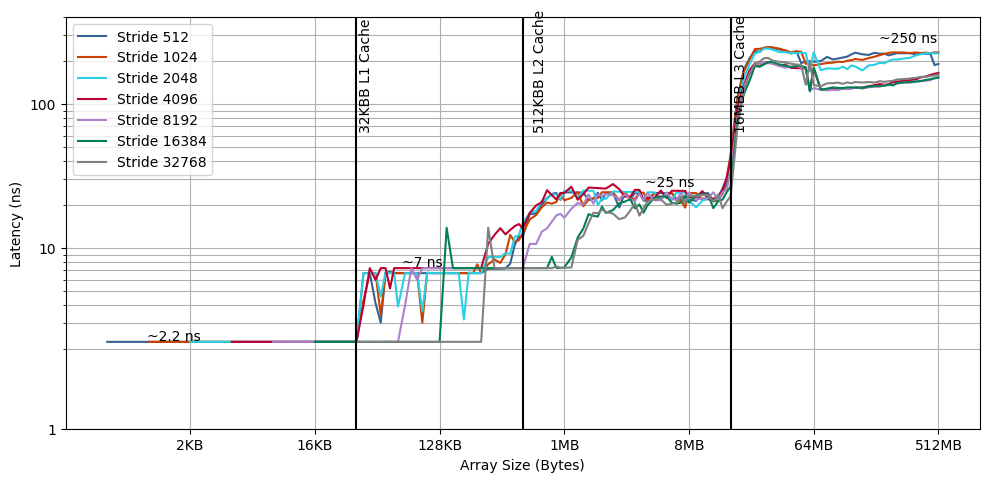

In [77]:
save = global_save;figname = f"{cpu_output_folder}/lmbench.pdf"  # fmt: skip
########### LMBench plot ###########
plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
for k, v in sizes.items():
    plt.plot(v, latencies[k], label=f"Stride {k}")

hmax = 400
div = 6
plt.vlines(cpu_l1_size, ymin=0, ymax=hmax, color="k")
plt.text(
    cpu_l1_size + 1500,
    hmax / div,
    f"{human_readable(cpu_l1_size, bytes=True)}B L1 Cache",
    rotation=90,
)
plt.vlines(cpu_l2_size, ymin=0, ymax=hmax, color="k")
plt.text(
    cpu_l2_size + 100500,
    hmax / div,
    f"{human_readable(cpu_l2_size, bytes=True)}B L2 Cache",
    rotation=90,
)
plt.vlines(cpu_l3_size, ymin=0, ymax=hmax, color="k")
plt.text(
    cpu_l3_size + 1000000,
    hmax / div,
    f"{human_readable(cpu_l3_size, bytes=True)}B L3 Cache",
    rotation=90,
)

offset = 0.5
hlx = 0.005
# plt.hlines(1.4, xmin=0, xmax=1e9, color="k")
plt.text(1e3, T_cpu_l1 + 0.1, f"~{T_cpu_l1} ns")
# plt.hlines(4, xmin=0, xmax=1e9, color="gray")
plt.text(70e3, T_cpu_l2 + offset, f"~{T_cpu_l2} ns")
# plt.hlines(24, xmin=0, xmax=1e9, color="gray")
plt.text(4e6, T_cpu_l3 + 2, f"~{T_cpu_l3} ns")
# plt.hlines(80, xmin=0, xmax=1e9, color="gray")
plt.text(200e6, T_cpu_mem + 20, f"~{T_cpu_mem} ns")

plt.legend()

plt.xlabel("Array Size (Bytes)")
plt.xscale("log", base=2)
ax.xaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, _: f"{human_readable(int(x), bytes=True)}")
)  #
# plt.xlim([0.0005, 32])
# plt.ticklabel_format(axis='x', style='plain')

plt.ylabel("Latency (ns)")
plt.yscale("symlog")
plt.ylim([1, hmax])
yaxis = plt.gca().yaxis
yaxis.set_minor_locator(MinorSymLogLocator(1e-1))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%g"))
plt.grid(True, which="both")

# plt.title("LMBench results of memory read latency with different strides and array sizes on ")
plt.tight_layout()
if save:
    plt.savefig(figname, format="pdf")
plt.show()

## Microbenchmark Data

In [78]:
filename = f"{cpu_mb_input_folder}/cpu_calibration.json"
# filename = "../das6-cpu-microbenchmark.result"

with open(filename, "r") as f:
    jdata = json.load(f)
cpu_bm_df = pd.DataFrame.from_dict(jdata["benchmarks"]).astype({"real_time": float})

convert_to_type(cpu_bm_df, "real_time", np.float64)
cpu_bm_df["func_name"] = cpu_bm_df["name"].apply(lambda s: s.split("/")[0][3:])
del cpu_bm_df["family_index"], cpu_bm_df["per_family_instance_index"]

cpu_bm_df.head(10)

,name,run_name,run_type,repetitions,threads,aggregate_name,aggregate_unit,iterations,real_time,cpu_time,time_unit,bin,nbins,val,dim,func_name
0,BM_BinarySearch/8/0_mean,BM_BinarySearch/8/0,aggregate,1000000.0,1,mean,time,3,3.015710,3.011555,ms,0.0,1.0,0.0,NaN,BinarySearch
1,BM_BinarySearch/8/0_median,BM_BinarySearch/8/0,aggregate,1000000.0,1,median,time,3,3.256148,3.251686,ms,0.0,1.0,0.0,NaN,BinarySearch
2,BM_BinarySearch/8/0_stddev,BM_BinarySearch/8/0,aggregate,0.0,1,stddev,time,3,0.497917,0.496587,ms,0.0,0.0,0.0,NaN,BinarySearch
3,BM_BinarySearch/8/0_cv,BM_BinarySearch/8/0,aggregate,0.0,1,cv,percentage,3,0.165108,0.164894,ms,NaN,0.0,NaN,NaN,BinarySearch
4,BM_BinarySearch/16/0_mean,BM_BinarySearch/16/0,aggregate,1000000.0,1,mean,time,3,3.894948,3.891766,ms,0.0,2.0,0.0,NaN,BinarySearch
5,BM_BinarySearch/16/0_median,BM_BinarySearch/16/0,aggregate,1000000.0,1,median,time,3,3.895028,3.891839,ms,0.0,2.0,0.0,NaN,BinarySearch
6,BM_BinarySearch/16/0_stddev,BM_BinarySearch/16/0,aggregate,0.0,1,stddev,time,3,0.000927,0.001011,ms,0.0,0.0,0.0,NaN,BinarySearch
7,BM_BinarySearch/16/0_cv,BM_BinarySearch/16/0,aggregate,0.0,1,cv,percentage,3,0.000238,0.000260,ms,NaN,0.0,NaN,NaN,BinarySearch
8,BM_BinarySearch/32/0_mean,BM_BinarySearch/32/0,aggregate,1000000.0,1,mean,time,3,4.080703,4.077300,ms,0.0,4.0,0.0,NaN,BinarySearch
9,BM_BinarySearch/32/0_median,BM_BinarySearch/32/0,aggregate,1000000.0,1,median,time,3,4.078571,4.075153,ms,0.0,4.0,0.0,NaN,BinarySearch


# Find Bin

## Design

In [79]:
def T_cpu_bscm(cache_size, sub_size, nbins):
    # return (np.log2(sub_size) -
    #         np.log2( cache_size-( np.log2(nbins) - np.log2(sub_size) ) )
    #         + 1).clip(0)
    if cache_size > np.log2(nbins) - np.log2(sub_size):
        return (
            np.log2(sub_size)
            - np.log2(cache_size - (np.log2(nbins) - np.log2(sub_size)))
            + 1
        ).clip(0)
    else: 
        return np.log2(nbins) - cache_size    
T_cpu_bscm = np.vectorize(T_cpu_bscm)

def T_cpu_binsearch(nbins, subsize):
    return (
        np.log2(nbins) * T_cpu_l1
        + T_cpu_bscm(cpu_l1_size / 8, subsize, nbins) * T_cpu_l2
        + T_cpu_bscm(cpu_l2_size / 8, subsize, nbins) * T_cpu_l3
        + T_cpu_bscm(cpu_l3_size / 8, subsize, nbins) * T_cpu_mem
    )


def T_cpu_findbin(edges, nbins, subsize):
    if edges:
        return T_cpu_binsearch(nbins, subsize)
    else:
        try:
            return np.repeat(T_cpu_fixedsearch, len(nbins))
        except:
            return T_cpu_fixedsearch

## Calibration

In [80]:
fxs_df = cpu_bm_df[cpu_bm_df["func_name"] == "FixedSearch"].copy()
fxs_mean = fxs_df.loc[fxs_df["name"].str.contains("mean")]
fxs_std = fxs_df.loc[fxs_df["name"].str.contains("stddev")]
fxs_mean

,name,run_name,run_type,repetitions,threads,aggregate_name,aggregate_unit,iterations,real_time,cpu_time,time_unit,bin,nbins,val,dim,func_name
520,BM_FixedSearch/manual_time_mean,BM_FixedSearch/manual_time,aggregate,1000000.0,1,mean,time,3,25.760382,64.630532,ms,-2.147484e+09,NaN,NaN,NaN,FixedSearch


In [81]:
T_cpu_fixedsearch = (
    fxs_mean["real_time"].values[0]
    * unit_to_unit_factor(fxs_mean["time_unit"].values[0], "ns")
    / fxs_mean["repetitions"].values[0]
)
T_cpu_fixedsearch

25.76038224714782

## Validation

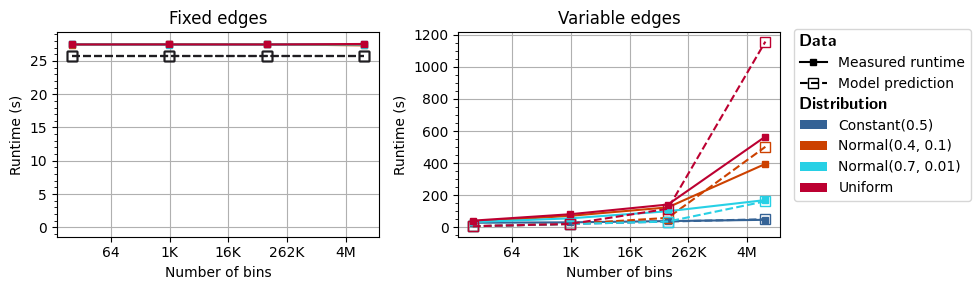

In [82]:
save = global_save; figname = f"{cpu_output_folder}/cpu_findbin_validation.pdf"  # fmt: skip
####### nbins vs nvals, distr subplots ###########

selected_env = "CPU"
selected_bulksize = 32768
selected_nvals = 1e9
unit = "s"

fig = plt.figure(figsize=(8, 3))
ax = plt.subplot(121)

# Legend Labels
plot_validation_labels()
ax.set_title("Fixed edges")

for di, distr in enumerate(unique_distribution):
    arg = selected_env, distr, selected_nvals, unique_nbins, selected_bulksize, False
    avg = cpu_gp_ivd.mean().loc[arg]
    std = cpu_gp_ivd.std().loc[arg]

    p = ax.errorbar(
        unique_nbins,
        avg["tfindbin"],
        yerr=std["tfindbin"],
        **bm_style,
    )

    # Legend Labels
    ax.add_patch(
        ptchs.Rectangle(
            (0, 0), 0, 0, facecolor=p[0].get_color(), label=f"{map_distr_name(distr)}"
        )
    )

    ## prediction
    subsize = get_subsize(distr, unique_nbins)
    pred = (
        T_cpu_findbin(False, unique_nbins, subsize)
        * unit_to_unit_factor("ns", unit)
        * selected_nvals
    )
    ax.errorbar(unique_nbins, pred, c=pred_color, **pred_nocolor_style)


plt.xlabel("Number of bins")
plt.xscale("log", base=2)
ax.xaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, _: f"{human_readable(int(x))}")
)

plt.ylabel("Runtime (s)")
yaxis = plt.gca().yaxis
ax.grid(True, which="major")
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%g"))

##############3
ax = plt.subplot(122)

# Legend Labels
plot_validation_labels()
ax.set_title("Variable edges")
for di, distr in enumerate(unique_distribution):
    arg = selected_env, distr, selected_nvals, unique_nbins, selected_bulksize, True
    avg = cpu_gp_ivd.mean().loc[arg]
    std = cpu_gp_ivd.std().loc[arg]

    p = ax.errorbar(
        unique_nbins,
        avg["tfindbin"],
        yerr=std["tfindbin"],
        **bm_style,
    )

    # Legend Labels
    ax.add_patch(
        ptchs.Rectangle(
            (0, 0), 0, 0, facecolor=p[0].get_color(), label=f"{map_distr_name(distr)}"
        )
    )

    ## prediction
    c = p[0].get_color()
    subsize = get_subsize(distr, unique_nbins)
    pred = (
        T_cpu_findbin(True, unique_nbins, subsize)
        * unit_to_unit_factor("ns", unit)
        * selected_nvals
    )
    ax.errorbar(unique_nbins, pred, c=c, **pred_nocolor_style)

    # observ = avg["tfindbin"].values
    # print(distr, pred, mae(pred, observ), r2(pred, observ) * 100)

plt.xlabel("Number of bins")
plt.xscale("log", base=2)
ax.xaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, _: f"{human_readable(int(x))}")
)

plt.ylabel("Runtime (s)")
# plt.yscale("symlog")
# plt.ylim([0,1000])
yaxis = plt.gca().yaxis
ax.grid(True, which="major")
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%g"))

##########
hndls = ax.get_legend_handles_labels()[0]
hndls.insert(0, "Data")
hndls.insert(3, "Distribution")

lbls = ax.get_legend_handles_labels()[1]
lbls.insert(0, "")
lbls.insert(3, "")

legend = fig.legend(
    hndls,
    lbls,
    loc="center left",
    bbox_to_anchor=(0.99, 0.6),
    handler_map={str: LegendTitle({"fontsize": 12})},
)

plt.tight_layout()
plt.savefig(figname, format="pdf", bbox_inches="tight")
plt.show()

# Add Bin Content

## Design

In [83]:
def T_cpu_fill(distr, nbins):
    subsize = get_subsize(distr, nbins)

    # Number of lines > Number of max lines
    l1_miss = (np.array(subsize) * 8 / 64 > cpu_l1_size/64).astype(np.int64)
    l2_miss = (np.array(subsize) * 8 / 64 > cpu_l2_size/64).astype(np.int64)
    l3_miss = (np.array(subsize) * 8 / 64 > cpu_l3_size/64).astype(np.int64)
    return (
        T_cpu_l1
        + l1_miss * T_cpu_l2
        + l1_miss * l2_miss * T_cpu_l3
        + l1_miss * l2_miss * l3_miss * T_cpu_mem
    )

In [84]:
# def T_cpu_fill(distr, nbins):
#     # Number of lines > Number of max lines
#     #  https://www3.nd.edu/~rwilliam/stats1/x21.pdf
#     if "constant" in distr:
#         misses = [0, 0, 0, 0]
#     elif "uniform" in distr:
#         misses = [1]
#         for s in [cpu_l1_size, cpu_l2_size, cpu_l3_size]:
#             misses.append(np.clip(misses[-1]* (1-s/nbins), 0, 1))
#     elif "normal" in distr:
#         mu = np.float64(distr.split("-")[1])
#         sigma = np.float64(distr.split("-")[2])
#         misses = [1]
#         for s in [cpu_l1_size, cpu_l2_size, cpu_l3_size]:
#             if nbins < s:
#                 misses.append(0)
#             else:
#                 b_mu = mu*nbins
#                 b_1 = b_mu - s/8/2
#                 b_2 = b_mu + s/8/2
#                 x_1 = ((b_1-1) * (1/nbins))
#                 x_2 = (b_2 * (1/nbins))
#                 z_1 = (x_1-mu)/sigma
#                 z_2 = (x_2-mu)/sigma
#                 p_1 = scipy.stats.norm.cdf(-3, mu, sigma)
#                 p_2 = scipy.stats.norm.cdf(z_2, mu, sigma)
#                 print("Cache:", s)
#                 print("mu",mu, b_mu)
#                 print("b", b_1, b_2)
#                 print("x", x_1, x_2)
#                 print("z", z_1, z_2)
#                 print("p", p_1, p_2, p_2-p_1)
#                 misses.append(np.clip(misses[-1]*(p_1+(1-p_2)), 0, 1))

#     print()
#     print(distr, nbins, misses)
#     return (
#         T_cpu_l1
#         + misses[1] * T_cpu_l2
#         + misses[2]  * T_cpu_l3
#         + misses[3]  * T_cpu_mem
#     )
# T_cpu_fill = np.vectorize(T_cpu_fill)

## Calibration

In [85]:
T_cpu_fill("normal-0.4-0.1", 100e3)

9.2

In [86]:
# scipy.stats.norm.cdf(0.4, mu, sigma)

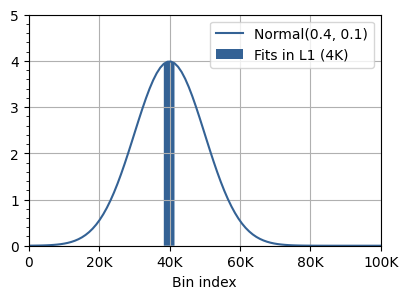

In [87]:
mu = 0.4
sigma = 0.1
x = np.linspace(0, 1, 100)

fig = plt.figure(figsize=(10, 3))
ax = plt.subplot(121)

plt.plot(x, scipy.stats.norm.pdf(x, mu, sigma), label=f"Normal({mu}, {sigma})")
plt.fill_between(x, scipy.stats.norm.pdf(x, mu, sigma), where= (x>=0.37951) & (x<=0.42048), 
                 label="Fits in L1 (4K)")
# plt.vlines(mu+sigma, 0,5, color="k")
# plt.vlines(mu+sigma*0.20479999999999998, 0,5, color="r")
plt.legend()
plt.xlim([0,1])
plt.ylim([0,5])
# plt.yticks([])
ax.xaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, _: f"{human_readable(x*100e3)}")
)
plt.xlabel("Bin index")
plt.show()

## Validation

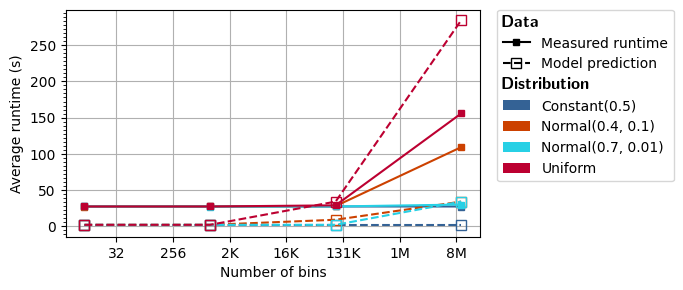

In [88]:
save = global_save; figname = f"{cpu_output_folder}/cpu_addbincontent_validation.pdf"  # fmt: skip

selected_env = "CPU"
selected_bulksize = 32768
selected_nvals = 1e9
selected_distr = sorted(unique_distribution)
selected_edges = False

fig = plt.figure(figsize=(5, 3))
ax = plt.subplot(111)

# Legend Labels
plot_validation_labels()

for di, distr in enumerate(selected_distr):
    arg = (
        selected_env,
        distr,
        selected_nvals,
        unique_nbins,
        selected_bulksize,
        selected_edges,
    )
    avg = cpu_gp_ivd.mean().loc[arg]
    std = cpu_gp_ivd.std().loc[arg]

    p = ax.errorbar(unique_nbins, avg["tfill"], yerr=std["tfill"], **bm_style)

    # Legend Labels
    ax.add_patch(
        ptchs.Rectangle(
            (0, 0), 0, 0, facecolor=p[0].get_color(), label=f"{map_distr_name(distr)}"
        )
    )

    pred = (
        T_cpu_fill(distr, unique_nbins)
        * selected_nvals
        * unit_to_unit_factor("ns", "s")
    )
    ax.errorbar(unique_nbins, pred, c=p[0].get_color(), **pred_nocolor_style)

hndls = ax.get_legend_handles_labels()[0]
hndls.insert(0, "Data")
hndls.insert(3, "Distribution")

lbls = ax.get_legend_handles_labels()[1]
lbls.insert(0, "")
lbls.insert(3, "")
legend = fig.legend(
    hndls,
    lbls,
    loc="center left",
    bbox_to_anchor=(0.99, 0.665),
    handler_map={str: LegendTitle({"fontsize": 12})},
)

plt.xlabel("Number of bins")
plt.xscale("log", base=2)
ax.xaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, _: f"{human_readable(int(x))}")
)

plt.ylabel("Average runtime (s)")
yaxis = plt.gca().yaxis
yaxis.set_minor_locator(MinorSymLogLocator(1e-1))
ax.grid(True, which="major")
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%g"))

plt.tight_layout()
if save:
    plt.savefig(figname, format="pdf", bbox_inches="tight")
plt.show()

# Update Stats

## Design

In [89]:
2.2 * 1e9 *unit_to_unit_factor("ns", "s")

2.2

## Calibration

In [90]:
cpu_usb_df = cpu_bm_df[cpu_bm_df["func_name"] == "UpdateStats"].copy()
cpu_usb_mean = cpu_usb_df.loc[cpu_usb_df["name"].str.contains("mean")]
cpu_usb_std = cpu_usb_df.loc[cpu_usb_df["name"].str.contains("stddev")]
cpu_usb_mean

,name,run_name,run_type,repetitions,threads,aggregate_name,aggregate_unit,iterations,real_time,cpu_time,time_unit,bin,nbins,val,dim,func_name
524,BM_UpdateStats/1/manual_time_mean,BM_UpdateStats/1/manual_time,aggregate,1000000.0,1,mean,time,3,27.276312,78.221936,ms,NaN,NaN,NaN,1.0,UpdateStats


In [91]:
T_cpu_updatestats = (
    cpu_usb_mean.loc[cpu_usb_mean["dim"] == 1]["real_time"]
    * unit_to_unit_factor(cpu_usb_mean["time_unit"].values[0], "ns")
    / cpu_usb_mean["repetitions"].values[0]
).values[0]
T_cpu_updatestats

27.276311577290375

## Validation

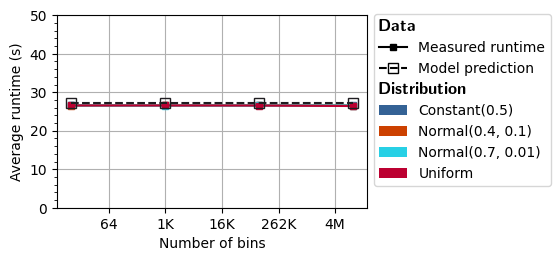

In [92]:
save = global_save; figname = f"{cpu_output_folder}/cpu_updatestats_validation.pdf"  # fmt: skip

selected_env = "CPU"
selected_bulksize = 32768
selected_nbins = 10e6
selected_nvals = 1e9
selected_distr = sorted(unique_distribution)
selected_edges = False

fig = plt.figure(figsize=(4, 2.5))
ax = plt.subplot(111)
plot_validation_labels()

for di, distr in enumerate(selected_distr):
    arg = (
        selected_env,
        distr,
        selected_nvals,
        unique_nbins,
        selected_bulksize,
        selected_edges,
    )
    avg = cpu_gp_ivd.mean().loc[arg]
    std = cpu_gp_ivd.std().loc[arg]

    p = ax.errorbar(
        unique_nbins,
        avg["tstats"],
        yerr=std["tstats"],
        **bm_style,
    )

    # Legend Labels
    ax.add_patch(
        ptchs.Rectangle(
            (0, 0), 0, 0, facecolor=p[0].get_color(), label=f"{map_distr_name(distr)}"
        )
    )


# print(distr)
pred = np.repeat(
    T_cpu_updatestats * selected_nvals * unit_to_unit_factor("ns", "s"),
    len(unique_nbins),
)
ax.errorbar(
    unique_nbins,
    pred,
    c=pred_color,
    marker="s",
    markerfacecolor="none",
    ls="--",
    markersize=7,
)
# observ = avg["tstats"].values
# print("MAE:", mae(pred, observ))
# print("R2:", r2(pred, observ) * 100)

plt.xlabel("Number of bins")
plt.xscale("log", base=2)
ax.xaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, _: f"{human_readable(int(x))}")
)
plt.ylim([0, 50])
plt.ylabel("Average runtime (s)")

###############

# ax = plt.subplot(122)

# for di, distr in enumerate(selected_distr):
#     arg = (
#         selected_env,
#         distr,
#         unique_nvals,
#         selected_nbins,
#         selected_bulksize,
#         selected_edges,
#     )
#     avg = cpu_gp_ivd.mean().loc[arg]
#     std = cpu_gp_ivd.std().loc[arg]

#     p = ax.errorbar(
#         unique_nvals,
#         avg["tstats"],
#         yerr=std["tstats"],
#         **bm_style,
#     )

# pred = T_cpu_updatestats * unique_nvals * unit_to_unit_factor("ns", "s")
# ax.errorbar(
#     unique_nvals,
#     pred,
#     c=pred_color,
#     **pred_nocolor_style,
# )
# observ = avg["tstats"].values
# print("MAE:", mae(pred, observ))
# print("R2:", r2(pred, observ) * 100)

# plt.xlabel("Number of events")
# plt.ylabel("Average runtime (s)")
# plt.xscale("log", base=2)
# ax.xaxis.set_major_formatter(
#     ticker.FuncFormatter(lambda x, _: f"{human_readable(int(x))}")
# )

# plt.ylim([0, 50])

hndls = ax.get_legend_handles_labels()[0]
hndls.insert(0, "Data")
hndls.insert(3, "Distribution")

lbls = ax.get_legend_handles_labels()[1]
lbls.insert(0, "")
lbls.insert(3, "")

legend = fig.legend(
    hndls,
    lbls,
    loc="center left",
    bbox_to_anchor=(0.9, 0.54),
    handler_map={str: LegendTitle({"fontsize": 12})},
)

if save:
    plt.savefig(figname, format="pdf", bbox_inches="tight")
plt.show()

# Total Validation

## Total vs. inner timings

In [93]:
unique_bulksize

array([1.00000000e+00, 8.00000000e+00, 6.40000000e+01, 5.12000000e+02,
       4.09600000e+03, 8.19200000e+03, 1.63840000e+04, 3.27680000e+04,
       6.55360000e+04, 1.31072000e+05, 2.62144000e+05, 2.09715200e+06,
       1.67772160e+07, 1.34217728e+08])

In [94]:
inner_cpu_validation_df["bulksize"].unique()

array([     1,      8,     64,    512,   4096,  32768, 262144])

In [95]:
ivd_unique_bulksize = np.array(
    [v for v in unique_bulksize if v in inner_cpu_validation_df["bulksize"].unique()]
)
ivd_unique_bulksize

array([1.00000e+00, 8.00000e+00, 6.40000e+01, 5.12000e+02, 4.09600e+03,
       3.27680e+04, 2.62144e+05])

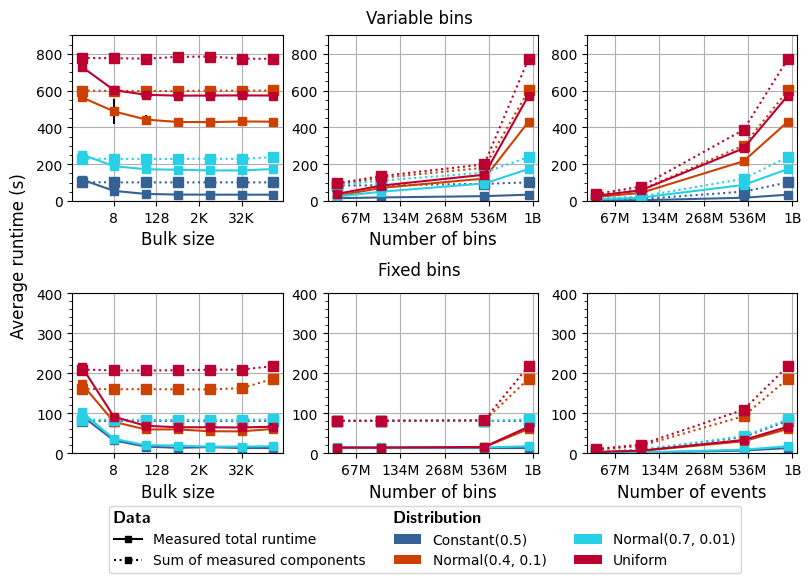

In [96]:
save = global_save; figname = f"{cpu_output_folder}/cpu_total_vs_inner.pdf"  # fmt: skip
selected_env = "CPU"
selected_bulksize = 262144
selected_nbins = 10e6
selected_nvals = 1e9
selected_distr = unique_distribution

# fig = plt.figure(figsize=(8, 5))
fig = plt.figure(constrained_layout=True, figsize=(8, 5))
(subfig1, subfig2) = fig.subfigures(2, 1)  # create 2x1 subfigures
(ax1, ax2, ax3) = subfig1.subplots(1, 3)  # create 1x2 subplots on subfig1
(ax4, ax5, ax6) = subfig2.subplots(1, 3)  # create 1x2 subplots on subfig2
axes = [ax1, ax2, ax3, ax4, ax5, ax6]

hmax = 900
for edi, edg in enumerate([True, False]):
    ax = axes[edi * 3]
    for di, distr in enumerate(selected_distr):
        arg = (
            selected_env,
            distr,
            selected_nvals,
            selected_nbins,
            ivd_unique_bulksize,
            edg,
        )
        ttotal_avg = cpu_gp_vd.mean().loc[arg]["ttotal"]
        ttotal_std = cpu_gp_vd.std().loc[arg]["ttotal"]
        p = ax.errorbar(
            ivd_unique_bulksize,
            ttotal_avg,
            yerr=ttotal_std,
            marker="s",
            ecolor="k",
            # label=f"{distr} bin{'s' if int(nb) > 1 else ''}"
            # label=f"{distr} total"
        )
        tfill_avg = cpu_gp_ivd.mean().loc[arg]["tfill"]
        tfill_std = cpu_gp_ivd.std().loc[arg]["tfill"]
        tusb_avg = cpu_gp_ivd.mean().loc[arg]["tstats"]
        tcpu_usb_std = cpu_gp_ivd.std().loc[arg]["tstats"]
        tfindbin_avg = cpu_gp_ivd.mean().loc[arg]["tfindbin"]
        tfindbin_std = cpu_gp_ivd.std().loc[arg]["tfindbin"]
        p = ax.errorbar(
            ivd_unique_bulksize,
            tfill_avg + tusb_avg + tfindbin_avg,
            yerr=tfill_std + tcpu_usb_std + tfindbin_std,
            color=p[0].get_color(),
            **sum_style,
        )

    ax.set_xlabel("Bulk size", fontsize=12)
    ax.set_xscale("log", base=2)
    ax.xaxis.set_major_formatter(
        ticker.FuncFormatter(lambda x, _: f"{human_readable(int(x))}")
    )
    ax.set_ylim([0, hmax - (not edg) * 500])
    # plt.ylabel("Average runtime (s)")

    ###########
    ax = axes[edi * 3 + 1]
    for di, distr in enumerate(selected_distr):
        arg = selected_env, distr, selected_nvals, unique_nbins, selected_bulksize, edg
        ttotal_avg = cpu_gp_vd.mean().loc[arg]["ttotal"]
        ttotal_std = cpu_gp_vd.std().loc[arg]["ttotal"]
        p = ax.errorbar(
            unique_nvals,
            ttotal_avg,
            yerr=ttotal_std,
            marker="s",
            ecolor="k",
            # label=f"{distr} bin{'s' if int(nb) > 1 else ''}"
            # label=f"{distr} total"
        )
        tfill_avg = cpu_gp_ivd.mean().loc[arg]["tfill"]
        tfill_std = cpu_gp_ivd.std().loc[arg]["tfill"]
        tusb_avg = cpu_gp_ivd.mean().loc[arg]["tstats"]
        tcpu_usb_std = cpu_gp_ivd.std().loc[arg]["tstats"]
        tfindbin_avg = cpu_gp_ivd.mean().loc[arg]["tfindbin"]
        tfindbin_std = cpu_gp_ivd.std().loc[arg]["tfindbin"]
        p = ax.errorbar(
            unique_nvals,
            tfill_avg + tusb_avg + tfindbin_avg,
            yerr=tfill_std + tcpu_usb_std + tfindbin_std,
            color=p[0].get_color(),
            **sum_style,
        )

    ax.set_xlabel("Number of bins", fontsize=12)
    ax.set_xscale("log", base=2)
    ax.xaxis.set_major_formatter(
        ticker.FuncFormatter(lambda x, _: f"{human_readable(int(x))}")
    )
    # plt.ylim([0, 50])
    ax.set_ylim([0, hmax - (not edg) * 500])
    # plt.ylabel("Average runtime (s)")

    ###########
    ax = axes[edi * 3 + 2]
    ax.plot(0, 0, label="Measured total runtime", c="k", marker="s", markersize=5)
    ax.plot(
        0,
        0,
        label="Sum of measured components",
        c="k",
        marker="s",
        ls=":",
        markersize=5,
    )
    for di, distr in enumerate(selected_distr):
        arg = selected_env, distr, unique_nvals, selected_nbins, selected_bulksize, edg
        ttotal_avg = cpu_gp_vd.mean().loc[arg]["ttotal"]
        ttotal_std = cpu_gp_vd.std().loc[arg]["ttotal"]
        p = ax.errorbar(
            unique_nvals,
            ttotal_avg,
            yerr=ttotal_std,
            marker="s",
            ecolor="k",
            # label=f"{distr} bin{'s' if int(nb) > 1 else ''}"
            # label=f"{distr} total"
        )

        tfill_avg = cpu_gp_ivd.mean().loc[arg]["tfill"]
        tfill_std = cpu_gp_ivd.std().loc[arg]["tfill"]
        tusb_avg = cpu_gp_ivd.mean().loc[arg]["tstats"]
        tcpu_usb_std = cpu_gp_ivd.std().loc[arg]["tstats"]
        tfindbin_avg = cpu_gp_ivd.mean().loc[arg]["tfindbin"]
        tfindbin_std = cpu_gp_ivd.std().loc[arg]["tfindbin"]
        p = ax.errorbar(
            unique_nvals,
            tfill_avg + tusb_avg + tfindbin_avg,
            yerr=tfill_std + tcpu_usb_std + tfindbin_std,
            color=p[0].get_color(),
            **sum_style,
        )
        # Legend Labels
        ax.add_patch(
            ptchs.Rectangle(
                (0, 0),
                0,
                0,
                facecolor=p[0].get_color(),
                label=f"{map_distr_name(distr)}",
            )
        )

    plt.xlabel("Number of events", fontsize=12)
    ax.set_xscale("log", base=2)
    ax.xaxis.set_major_formatter(
        ticker.FuncFormatter(lambda x, _: f"{human_readable(int(x))}")
    )

    ax.set_ylim([0, hmax - (not edg) * 500])

# ax = plt.subplot(221)
subfig1.suptitle("Variable bins", fontsize=12)
subfig2.suptitle("Fixed bins", fontsize=12)
# ax = plt.subplot(223)
# fig.subplots_adjust(wspace=0.2, hspace=0.5)

hndls = ax.get_legend_handles_labels()[0]
hndls.insert(0, "Data")
hndls.insert(3, "Distribution")
hndls.insert(6, "")

lbls = ax.get_legend_handles_labels()[1]
lbls.insert(0, "")
lbls.insert(3, "")
lbls.insert(6, "")
legend = fig.legend(
    hndls,
    lbls,
    loc="lower left",
    bbox_to_anchor=(0.12, -0.15),
    ncols=3,
    handler_map={str: LegendTitle({"fontsize": 12})},
)

fig.supylabel("Average runtime (s)")
# plt.tight_layout()
if save:
    plt.savefig(figname, format="pdf", bbox_inches="tight")

plt.show()

## Runtime

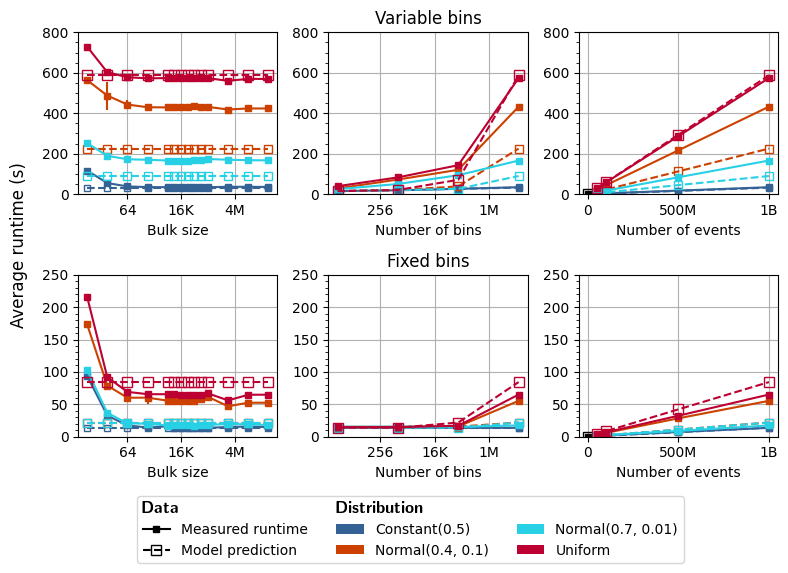

In [99]:
save = True; div = True; figname = f"{cpu_output_folder}/cpu_validation{'_div-t2.5-b4' if div else ''}.pdf"  # fmt: skip
selected_env = "CPU"
selected_bulksize = 32768
selected_nbins = 10e6
selected_nvals = 1e9
selected_distr = unique_distribution
# selected_distr = [
#                     "normal-0.4-0.1",
#                   "uniform"
#                  ]
edg = True

fig = plt.figure(figsize=(8, 5))
factorvar = 2.5
factorfix = 4

def ms(di):
    return 1.2 * di + 4


for edi, edg in enumerate([True, False]):
    ax = plt.subplot(2, 3, edi * 3 + 1)
    if div:
        hmax_exp = 800
        hdifd_imp = 550
        factor = factorvar if edg else factorfix 
    else:
        hmax_exp = 1600
        hdifd_imp = 1200
        factor = 1
    
    for di, distr in enumerate(selected_distr):
        arg = selected_env, distr, selected_nvals, selected_nbins, unique_bulksize, edg
        ttotal_avg = cpu_gp_vd.mean().loc[arg]["ttotal"]
        ttotal_std = cpu_gp_vd.std().loc[arg]["ttotal"]
        p = plt.errorbar(unique_bulksize, ttotal_avg, yerr=ttotal_std, **bm_style)

        # Predicition in nanoseconds!
        subsize = get_subsize(distr, selected_nbins)
        tfill_pred = T_cpu_fill(distr, selected_nbins)
        tfindbin_pred = T_cpu_findbin(edg, selected_nbins, subsize)
        tusb_pred = T_cpu_updatestats
        pred = np.repeat(
            (tfill_pred + tusb_pred + tfindbin_pred)
            * selected_nvals
            * unit_to_unit_factor("ns", "s"),
            len(unique_bulksize),
        )
        plt.errorbar(
            unique_bulksize,
            pred / factor,
            color=p[0].get_color(),
            **{**pred_nocolor_style, "markersize": ms(di)},
        )

    plt.xscale("log", base=2)
    ax.xaxis.set_major_formatter(
        ticker.FuncFormatter(lambda x, _: f"{human_readable(int(x))}")
    )
    plt.xlabel("Bulk size")

    plt.ylim([0, hmax_exp - (not edg) * hdifd_imp])
    # plt.ylabel("a")
    #######################################################
    ax = plt.subplot(2, 3, edi * 3 + 3)

    # Legend Labels
    ax.plot(0, 0, label="Measured total runtime", c="k", marker="s", markersize=5)
    plt.plot(
        0,
        0,
        label="Model prediction",
        c="k",
        marker="s",
        markersize=7,
        markerfacecolor="none",
    )
    for di, distr in enumerate(selected_distr):
        arg = selected_env, distr, unique_nvals, selected_nbins, selected_bulksize, edg
        ttotal_avg = cpu_gp_vd.mean().loc[arg]["ttotal"]
        ttotal_std = cpu_gp_vd.std().loc[arg]["ttotal"]
        p = plt.errorbar(unique_nvals, ttotal_avg, yerr=ttotal_std, **bm_style)

        # In nanoseconds!
        subsize = get_subsize(distr, selected_nbins)
        tfill_pred = T_cpu_fill(distr, selected_nbins)
        tfindbin_pred = T_cpu_findbin(edg, selected_nbins, subsize)
        tusb_pred = T_cpu_updatestats
        pred = (
            (tfill_pred + tusb_pred + tfindbin_pred)
            * unique_nvals
            * unit_to_unit_factor("ns", "s")
        )
        plt.errorbar(
            unique_nvals,
            pred / factor,
            color=p[0].get_color(),
            **{**pred_nocolor_style, "markersize": ms(di)},
        )

    # plt.xscale("log", base=2)
    ax.xaxis.set_major_formatter(
        ticker.FuncFormatter(lambda x, _: f"{human_readable(int(x))}")
    )
    plt.xlabel("Number of events")

    plt.ylim([0, hmax_exp - (not edg) * hdifd_imp])
    #######################################################
    ax = plt.subplot(2, 3, edi * 3 + 2)

    # Legend Labels
    plot_validation_labels()

    for di, distr in enumerate(selected_distr):
        arg = selected_env, distr, selected_nvals, unique_nbins, selected_bulksize, edg
        ttotal_avg = cpu_gp_vd.mean().loc[arg]["ttotal"]
        ttotal_std = cpu_gp_vd.std().loc[arg]["ttotal"]
        p = plt.errorbar(unique_nbins, ttotal_avg, yerr=ttotal_std, **bm_style)

        # In nanoseconds!
        subsize = get_subsize(distr, unique_nbins)
        tfill_pred = T_cpu_fill(distr, unique_nbins)
        tfindbin_pred = T_cpu_findbin(edg, unique_nbins, subsize)
        tusb_pred = T_cpu_updatestats
        pred = (
            (tfill_pred + tusb_pred + tfindbin_pred)
            * selected_nvals
            * unit_to_unit_factor("ns", "s")
        )
        plt.errorbar(
            unique_nbins,
            pred / factor,
            color=p[0].get_color(),
            **{**pred_nocolor_style, "markersize": ms(di)},
        )

        # Legend Labels
        ax.add_patch(
            ptchs.Rectangle(
                (0, 0),
                0,
                0,
                facecolor=p[0].get_color(),
                label=f"{map_distr_name(distr)}",
            )
        )

    plt.xscale("log", base=2)
    ax.xaxis.set_major_formatter(
        ticker.FuncFormatter(lambda x, _: f"{human_readable(int(x))}")
    )
    plt.xlabel("Number of bins")

    plt.ylim([0, hmax_exp - (not edg) * hdifd_imp])
    plt.title(f"{'Variable' if edg else 'Fixed'} bins")

#######################################################

hndls = ax.get_legend_handles_labels()[0]
hndls.insert(0, "Data")
hndls.insert(3, "Distribution")
hndls.insert(6, "")

lbls = ax.get_legend_handles_labels()[1]
lbls.insert(0, "")
lbls.insert(3, "")
lbls.insert(6, "")
legend = fig.legend(
    hndls,
    lbls,
    loc="lower left",
    bbox_to_anchor=(0.17, -0.15),
    ncols=3,
    # bbox_to_anchor=(1, 0.53),
    # ncols=1,
    handler_map={str: LegendTitle({"fontsize": 12})},
)

# plt.legend()
fig.supylabel("Average runtime (s)")

plt.tight_layout()
if save:
    plt.savefig(figname, format="pdf", bbox_inches="tight")